<a href="https://colab.research.google.com/github/maryembenghouma/Data-science-Projects/blob/main/DeepLearningNotebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Details:**

Objective: Prepare a Jupyter Notebook that outlines the various steps involved in data preprocessing for sentiment analysis tasks.

Requirements:

Dataset: Choose a suitable dataset related to sentiment analysis.

Preprocessing Steps: Your notebook should include the following preprocessing steps :

Data loading and exploration



1.   Text cleaning (removing special characters, punctuation, etc.)
2.   Tokenization
3.   Stop word removal
4.   Lemmatization/Stemming
5.   Any other relevant preprocessing techniques
6. vector

** prepare an example of an NLP task using a pretrained transformer
===> Group 2: Summary Generation









**Data Set ===> Amazon Fine Food Reviews

Context :
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/DeepLearning/Reviews.csv"

/content/drive/MyDrive/DeepLearning/Reviews.csv


In [ ]:
# Chargement du fichier CSV
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/Reviews.csv')

***** Data discovery ************************

In [ ]:
df.shape

(568454, 10)

In [ ]:

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()  # Affiche des informations sur les colonnes et le type de données


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


===> Most columns have complete data, except for ProfileName (missing 26 values) and Summary (missing 27 values). The dataset consists of 5 columns with integer data types (int64) and 5 columns with text or categorical data (object).

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


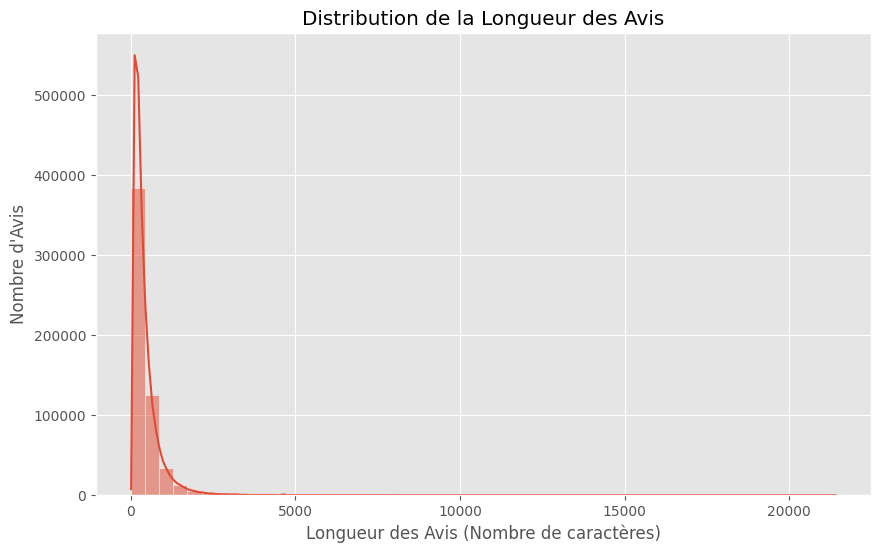

In [ ]:
# 4. Distribution de la longueur des avis
df['review_length'] = df['Text'].apply(lambda x: len(x))
plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution de la Longueur des Avis')
plt.xlabel('Longueur des Avis (Nombre de caractères)')
plt.ylabel('Nombre d\'Avis')
plt.show()

==> This visualization shows that most reviews are very short (less than 500 characters), with a large peak near zero. There are very few long reviews, and the distribution is heavily skewed to the left.

In [ ]:
# 5. Recherche de caractères spéciaux
import re
special_characters = df['Text'].apply(lambda x: re.findall(r'[^a-zA-Z0-9\s]', x))  # Extrait les caractères spéciaux
df['special_char_count'] = special_characters.apply(lambda x: len(x))  # Compte les caractères spéciaux


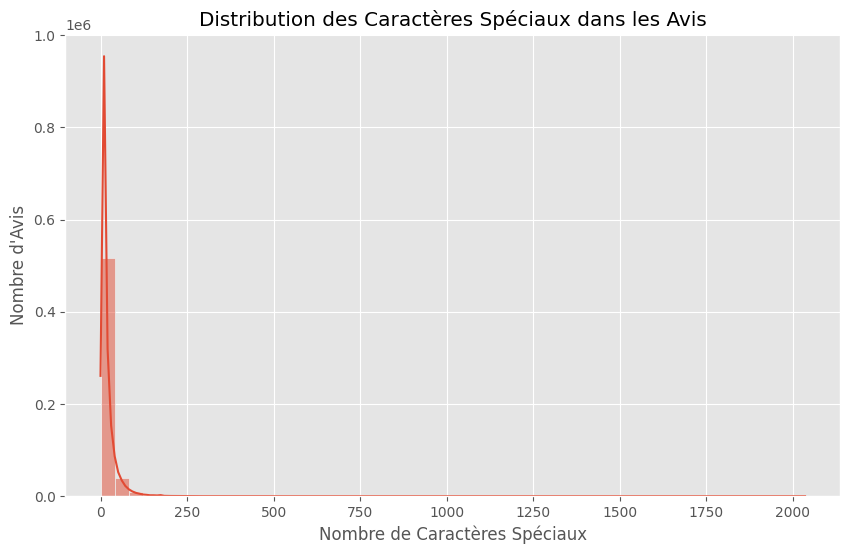

In [ ]:
# Visualisation des avis contenant des caractères spéciaux
plt.figure(figsize=(10,6))
sns.histplot(df['special_char_count'], bins=50, kde=True)
plt.title('Distribution des Caractères Spéciaux dans les Avis')
plt.xlabel('Nombre de Caractères Spéciaux')
plt.ylabel('Nombre d\'Avis')
plt.show()

==>This graph shows that most reviews contain very few special characters, with a sharp peak near zero. The number of reviews decreases as the count of special characters increases.

<ipython-input-12-9c80ee3c24d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[score_column], palette='Set2')


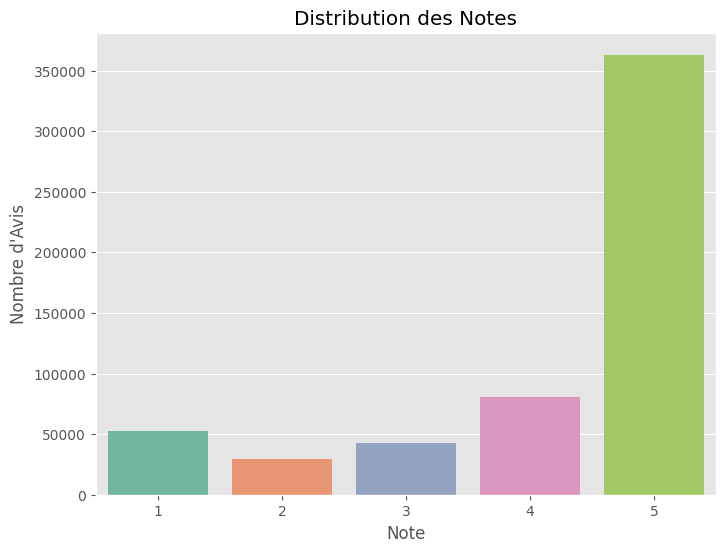

In [ ]:

# 6. Distribution des scores
if 'Score' in df.columns or 'Rating' in df.columns:
    score_column = 'Score' if 'Score' in df.columns else 'Rating'
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[score_column], palette='Set2')
    plt.title('Distribution des Notes')
    plt.xlabel('Note')
    plt.ylabel('Nombre d\'Avis')
    plt.show()

The chart indicates that the majority of reviews have a rating of 5, while lower ratings (1 to 4) account for fewer reviews. This suggests a strong tendency towards positive feedback.

In [ ]:
# 7. Analyse des mots fréquents (Word Frequency)
from collections import Counter

# Combine tous les avis en un seul texte
all_text = ' '.join(df['Text'])

# Sépare les mots
words = all_text.split()

# Compte la fréquence des mots
word_freq = Counter(words)

# Affiche les 20 mots les plus fréquents
common_words = word_freq.most_common(20)
print("Mots les plus fréquents :\n", common_words)

Mots les plus fréquents :
 [('the', 1628045), ('I', 1388076), ('and', 1228666), ('a', 1163164), ('to', 992367), ('of', 789652), ('is', 714264), ('it', 631252), ('for', 519983), ('in', 512394), ('this', 488313), ('that', 400467), ('my', 364021), ('with', 336250), ('have', 335286), ('but', 324932), ('are', 310933), ('was', 307861), ('not', 285094), ('you', 280382)]


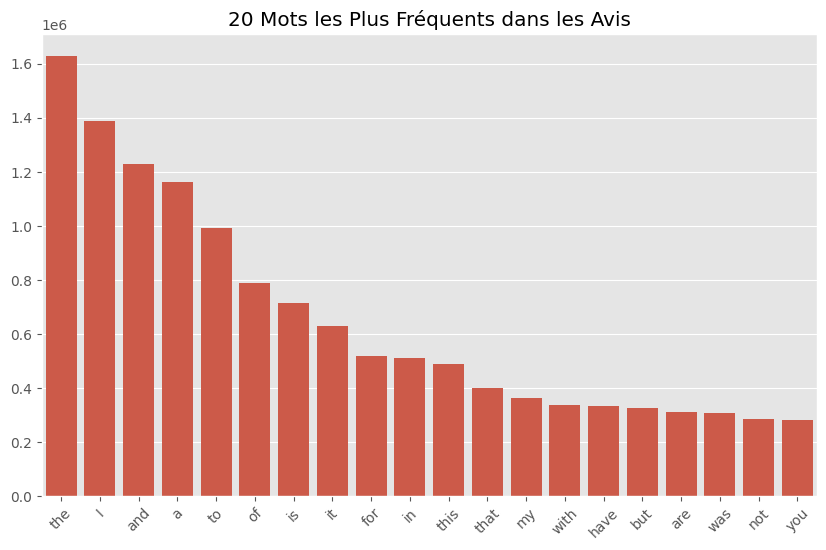

In [ ]:
# Visualisation des mots fréquents
words, counts = zip(*common_words)
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title('20 Mots les Plus Fréquents dans les Avis')
plt.show()

Text Cleaning

In [ ]:
example = df['Text'][4]
print(example)

Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.


Suppression des caractéres spécieaux , ponctuation et nombre

In [ ]:
import re

# Fonction de nettoyage du texte
def clean_text(text):
    # Mettre le texte en minuscule
    text = text.lower()

    # Retirer les caractères spéciaux, la ponctuation et les nombres
    text = re.sub(r'[^a-z\s]', '', text)

    return text

# Application de la fonction sur la colonne Text
df['cleaned_text'] = df['Text'].apply(clean_text)

# Afficher un exemple
print(df[['Text', 'cleaned_text']].head())


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        cleaned_text  
0  i have bought several of the vitality canned d...  
1  product arrived labeled as jumbo salted peanut...  
2  this is a confection that has been around a fe...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price  there was a wide...  


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Nettoyage du texte
cleaned_example = clean_text(example)
print("Texte nettoyé:\n", cleaned_example)

# Tokenisation de l'exemple nettoyé
from nltk.tokenize import word_tokenize
tokenized_example = word_tokenize(cleaned_example)
print("Après tokenisation:\n", tokenized_example)

# Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Suppression des stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

no_stopwords_example = remove_stopwords(tokenized_example)
print("Après suppression des stopwords:\n", no_stopwords_example)

# Lemmatisation
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_example = [lemmatizer.lemmatize(word) for word in no_stopwords_example]
print("Après lemmatisation:\n", lemmatized_example)

Texte nettoyé:
 great taffy at a great price  there was a wide assortment of yummy taffy  delivery was very quick  if your a taffy lover this is a deal
Après tokenisation:
 ['great', 'taffy', 'at', 'a', 'great', 'price', 'there', 'was', 'a', 'wide', 'assortment', 'of', 'yummy', 'taffy', 'delivery', 'was', 'very', 'quick', 'if', 'your', 'a', 'taffy', 'lover', 'this', 'is', 'a', 'deal']
Après suppression des stopwords:
 ['great', 'taffy', 'great', 'price', 'wide', 'assortment', 'yummy', 'taffy', 'delivery', 'quick', 'taffy', 'lover', 'deal']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Après lemmatisation:
 ['great', 'taffy', 'great', 'price', 'wide', 'assortment', 'yummy', 'taffy', 'delivery', 'quick', 'taffy', 'lover', 'deal']


*****

Vectorization (Word Embeddings)

In [ ]:
!pip install gensim


In [ ]:
from gensim.models import Word2Vec

# Tokenisation de l'ensemble des textes nettoyés
tokenized_texts = [word_tokenize(text) for text in df['cleaned_text']]

# Entraînement du modèle Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Exemple: obtenir le vecteur pour un mot
word_vector = word2vec_model.wv['good']  # Exemple avec le mot 'good'
print("Vecteur du mot 'good':\n", word_vector)

# Enregistrer le modèle pour une utilisation future
word2vec_model.save("word2vec_model.model")


Vecteur du mot 'good':
 [ 0.2869736  -3.223378   -4.4681625   0.5568827  -2.2474353   3.1589613
  1.4283808   0.75444293  2.4759831   1.3335115  -0.8328587   0.21952002
  1.911816   -0.64388305 -3.4716632  -0.5564282   4.00574     0.8243801
 -3.1557279   1.29437     3.0306835  -3.7761807  -0.42868394  0.30252603
 -2.3460622  -2.7999892   3.218821   -0.2486823   1.3565174   1.7187351
  2.0352309   0.16611488  1.927772   -1.4505826   0.66558874 -2.5476482
  2.125108   -0.6938891  -1.6148561  -0.5509133   1.7721648   0.95451623
  0.56050175 -1.807493    1.3111695   1.4887867   0.40802175 -0.62269425
 -1.145575   -2.4735007  -0.22082399  0.5789613  -0.26789021 -2.1379304
 -0.77430457  0.8441616   0.25952488  2.1681933  -0.21367249  1.8391736
  2.3925388  -0.5261656  -1.3309089   0.7597094  -0.89419127  2.4240193
 -2.2193766  -4.7841105   0.01451003  0.9794075  -2.2878523  -4.0033317
  0.54474723  0.02089777 -0.40857247  0.30784917  1.3596691  -1.4978222
 -3.4683845   1.834502    0.57884896

In [ ]:
# Téléchargement et extraction de GloVe
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-10-29 22:36:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-29 22:36:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-29 22:36:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
# Charger le modèle GloVe
glove_file = 'glove.6B/glove.6B.100d.txt'  # Assurez-vous que le chemin est correct
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

# Exemple : obtenir le vecteur pour un mot avec GloVe
glove_vector = glove_model['good']  # Exemple avec le mot 'good'
print("Vecteur du mot 'good' avec GloVe:\n", glove_vector)

# Comparaison des vecteurs de mots
print("Différence entre les vecteurs Word2Vec et GloVe:\n", word_vector - glove_vector)

NameError: name 'KeyedVectors' is not defined

In [ ]:

# Exemple de similarité
similarity_word2vec = word2vec_model.wv.similarity('good', 'bad')
similarity_glove = glove_model.similarity('good', 'bad')

print("Similarité entre 'good' et 'bad' (Word2Vec):", similarity_word2vec)
print("Similarité entre 'good' et 'bad' (GloVe):", similarity_glove)



*  Transformers



**BART** is a model by Facebook AI designed for text generation and summarization. It combines text-masking and generation techniques, making it effective for high-quality summaries and translations.

In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline

# Initialisation du modèle de résumé
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Appliquer la génération de résumé sur un échantillon de 5 lignes pour illustrer
sample_texts = df['cleaned_text'].sample(5).tolist()  # Extrait 5 exemples aléatoires
summaries = [summarizer(text, max_length=50, min_length=25, do_sample=False)[0]['summary_text'] for text in sample_texts]

# Afficher les textes originaux et leurs résumés
for i, (original, summary) in enumerate(zip(sample_texts, summaries)):
    print(f"\nTexte original {i+1}:\n{original}")
    print(f"Résumé {i+1}:\n{summary}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Your max_length is set to 50, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)



Texte original 1:
my order of crystal light came very quick and it was great i did not have to go shopping for it  if you drink alot of crystal light this is a good way to have it on hand
Résumé 1:
If you drink alot of crystal light this is a good way to have it on hand. my order of crystallight came very quick and it was great i did not have to go shopping for it.

Texte original 2:
before i bought this from amazon i looked at elmwood inns website and noticed a disparity between their prices and amazons  on amazon the price is much lower  i surmised this was old tea elmwood inn had overstockedbr br i think i was right  the pouch is as airtight and sturdy as any ive seen  but the tea leaves are a mixture of color mostly a nice jade but with some brown leaves and some leaves beginning to turn white  this must be a second or third flush  the leaves that remained intact are quite large  most of the leaves are broken but they are not fannings or dust  tea leaves are fragile and break duri

Essai 2 : t5-small

**T5** by Google is a text-to-text model that reformulates all NLP tasks as text conversion problems. This makes it versatile for applications like translation, summarization, and classification.








In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Initialiser le modèle T5 et son tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Fonction pour générer un résumé
def generate_summary(text):
    # Préparer le texte en ajoutant le préfixe "summarize:"
    input_text = "summarize: " + text
    # Tokenizer le texte
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
    # Générer le résumé
    summary_ids = model.generate(inputs, max_length=50, min_length=25, length_penalty=2.0, num_beams=4, early_stopping=True)
    # Décoder et retourner le résumé
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Appliquer la génération de résumé sur un échantillon de 5 lignes pour illustrer
sample_texts = df['cleaned_text'].sample(5).tolist()  # Extrait 5 exemples aléatoires
summaries = [generate_summary(text) for text in sample_texts]

# Afficher les textes originaux et leurs résumés
for i, (original, summary) in enumerate(zip(sample_texts, summaries)):
    print(f"\nTexte original {i+1}:\n{original}")
    print(f"Résumé {i+1}:\n{summary}")


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565



Texte original 1:
the price for this product was a little better than the last brand i bought and the price was a little lower
Résumé 1:
the price for this product was a little better than the last brand i bought. the price for this product was a little lower than the last brand i bought.

Texte original 2:
fog chaser was the best both in flavor and body  so far this is the only product that the body is compatible to the richer flavor of blew coffee that uses kcup system
Résumé 2:
fog chaser was the best both in flavor and body so far this is the only product that the body is compatible to the richer flavor of blew coffee that uses kcup system. fog chaser was the best both in flavor

Texte original 3:
our daughters dog is allergic to chicken so these snack treats are perfect for the pooch  patty loves them and they dont upset her stomach  we will try the other varieties as well
Résumé 3:
our daughters dog is allergic to chicken so these snack treats are perfect for the pooch patty. we

camparer les deux transformers selon score

In [ ]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=631c23579cab693b1ab69e17ca80b17b34f14025e3d8e33f969a75d0bc6afc19
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

# Initialiser le scorer ROUGE
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Générer des résumés avec BART
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
bart_summaries = [bart_summarizer(text, max_length=50, min_length=25, do_sample=False)[0]['summary_text'] for text in sample_texts]

# Générer des résumés avec T5
t5_summaries = [generate_summary(text) for text in sample_texts]

# Comparer les résumés des deux modèles en utilisant les scores ROUGE
for i, (original, bart_summary, t5_summary) in enumerate(zip(sample_texts, bart_summaries, t5_summaries)):
    print(f"\nTexte original {i+1}:\n{original}")

    # Scores ROUGE pour le modèle BART
    bart_scores = scorer.score(original, bart_summary)
    print(f"Résumé BART {i+1}:\n{bart_summary}")
    print(f"Scores ROUGE BART: {bart_scores}")

    # Scores ROUGE pour le modèle T5
    t5_scores = scorer.score(original, t5_summary)
    print(f"Résumé T5 {i+1}:\n{t5_summary}")
    print(f"Scores ROUGE T5: {t5_scores}")


Your max_length is set to 50, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 50, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 50, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)



Texte original 1:
the price for this product was a little better than the last brand i bought and the price was a little lower
Résumé BART 1:
The price for this product was a little better than the last brand i bought and the price was a a little lower.
Scores ROUGE BART: {'rouge1': Score(precision=0.9565217391304348, recall=1.0, fmeasure=0.9777777777777777), 'rouge2': Score(precision=0.9545454545454546, recall=1.0, fmeasure=0.9767441860465117), 'rougeL': Score(precision=0.9565217391304348, recall=1.0, fmeasure=0.9777777777777777)}
Résumé T5 1:
the price for this product was a little better than the last brand i bought. the price for this product was a little lower than the last brand i bought.
Scores ROUGE T5: {'rouge1': Score(precision=0.7, recall=0.9545454545454546, fmeasure=0.8076923076923077), 'rouge2': Score(precision=0.6206896551724138, recall=0.8571428571428571, fmeasure=0.7200000000000001), 'rougeL': Score(precision=0.7, recall=0.9545454545454546, fmeasure=0.8076923076923077)

==> Based on ROUGE scores and accuracy, BART tends to perform better. Its structure, which combines bidirectional and autoregressive techniques, allows it to capture both context and sequence effectively, making it particularly strong for summarization tasks where understanding and generating coherent text are crucial.